<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumSystem_CloseSystem_vs_OpenSystem_mkbahk_20250505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=302fcf83011892b9db758366a71a82454a13076027b8c5eb58f783f15d6b34f0
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.8 MB/s eta 0:00:00


In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector, array_to_latex, plot_state_qsphere

from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

from qiskit.primitives import Sampler, Estimator

닫힌 시스템 (순수 상태)

In [9]:
qc = QuantumCircuit(1)
qc.h(0)  # |ψ⟩ = |+⟩ = 1/√2(|0⟩ + |1⟩)
state = Statevector.from_instruction(qc)
print("Z 기저 확률:", state.probabilities_dict())
print("X 기대값:", state.expectation_value([[0, 1], [1, 0]]))  # Pauli-X

Z 기저 확률: {np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}
X 기대값: (0.9999999999999998+0j)


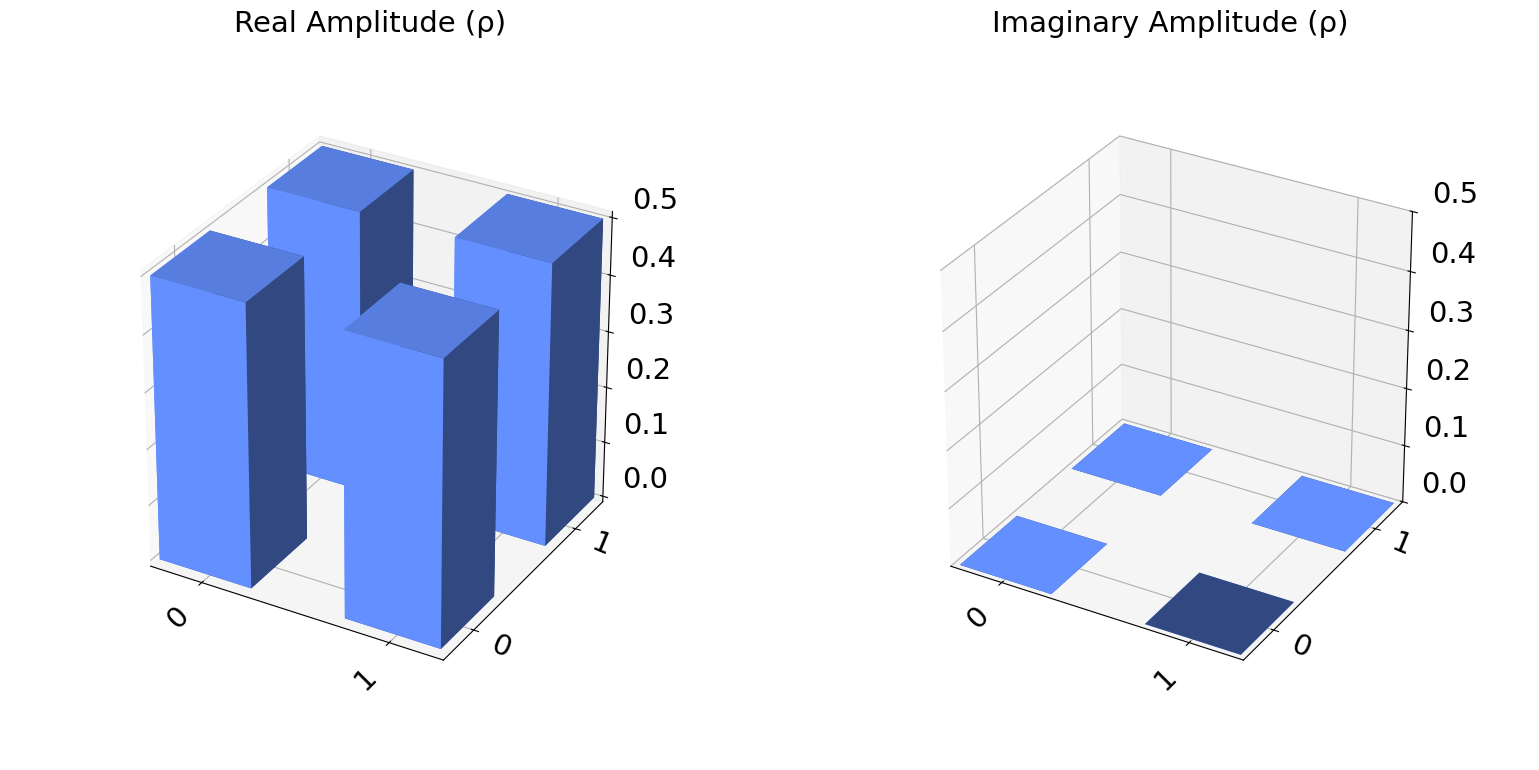

In [10]:
plot_state_city(state)

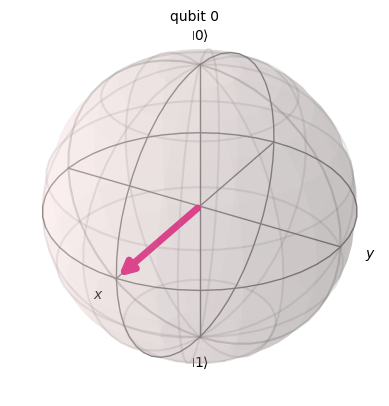

In [13]:
plot_bloch_multivector(state)

In [15]:
from qiskit.quantum_info import DensityMatrix, Operator
#from qiskit.providers.aer import AerSimulator # This module is no longer used
from qiskit_aer import AerSimulator # Use qiskit_aer to import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error # Import from qiskit_aer.noise

# 회로 및 노이즈 모델
qc2 = QuantumCircuit(1)
qc2.h(0)
noise_model = NoiseModel()
error = depolarizing_error(0.1, 1)  # 10% 탈위상 오류
noise_model.add_all_qubit_quantum_error(error, ['h'])

# 시뮬레이션
sim = AerSimulator(noise_model=noise_model)
qc2.save_density_matrix()
result = sim.run(qc2).result()
rho = result.data()['density_matrix']
print("Z 기저 확률:", rho.probabilities_dict())
print("X 기대값:", rho.expectation_value(Operator([[0, 1], [1, 0]])))

Z 기저 확률: {np.str_('0'): np.float64(0.5000000000000001), np.str_('1'): np.float64(0.49999999999999994)}
X 기대값: (0.9+0j)
